In [25]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt


In [26]:
# reading the csv files for general information and prices
data_info = pd.read_csv('Data/gpu_info.csv')
data_prices = pd.read_csv('Data/gpu_prices.csv')

In [27]:
manufacturer = data_info['manufacturer'].tolist()
product = data_info['productName'].tolist()
vram = data_info['memSize'].tolist()
memory_bus = data_info['memBusWidth'].tolist()
gpu_clock = data_info['gpuClock'].tolist()
mem_clock = data_info['memClock'].tolist()
release_year = data_info['releaseYear'].tolist()

In [28]:
df1 = pd.DataFrame({
    'Manufacturer' : manufacturer,
    'Product' : product,
    'VRAM' : vram,
    'Memory Bus Width' : memory_bus,
    'GPU Clock' : gpu_clock,
    'Memory Clock' : mem_clock,
    'Release Year' : release_year
})

In [29]:
# Highest vram
vram = data_info.loc[data_info['memSize'].idxmax()]
print('GPU with the highest VRAM:\n')
print(vram)

# Highest Memory Bus
mem_bus = data_info.loc[data_info['memBusWidth'].idxmax()]
print('\nGPU the highest Memory Bus:\n')
print(mem_bus)

GPU with the highest VRAM:

manufacturer                  NVIDIA
productName      GeForce RTX 3090 Ti
releaseYear                     2022
memSize                         24.0
memBusWidth                    384.0
gpuClock                        1560
memClock                      1313.0
unifiedShader                10752.0
tmu                              336
rop                              112
pixelShader                      NaN
vertexShader                     NaN
igp                               No
bus                     PCIe 4.0 x16
memType                       GDDR6X
gpuChip                        GA102
Name: 21, dtype: object

GPU the highest Memory Bus:

manufacturer               NVIDIA
productName      GeForce RTX 3080
releaseYear                  2022
memSize                      12.0
memBusWidth                 384.0
gpuClock                     1260
memClock                   1188.0
unifiedShader              8960.0
tmu                           280
rop                 

In [30]:
# Highest GPU clock
gpu_clock = data_info.loc[data_info['gpuClock'].idxmax()]
print('\nGPU the highest GPU Clock:\n')
print(gpu_clock)

# Highest Memory clock
mem_clock = data_info.loc[data_info['memClock'].idxmax()]
print('\nGPU the highest Memory Clock:\n')
print(mem_clock)


GPU the highest GPU Clock:

manufacturer                    AMD
productName      Radeon RX 6850M XT
releaseYear                    2022
memSize                        12.0
memBusWidth                   192.0
gpuClock                       2321
memClock                     2000.0
unifiedShader                2560.0
tmu                             160
rop                              64
pixelShader                     NaN
vertexShader                    NaN
igp                              No
bus                    PCIe 4.0 x16
memType                       GDDR6
gpuChip                     Navi 22
Name: 42, dtype: object

GPU the highest Memory Clock:

manufacturer               NVIDIA
productName      GeForce GTX 1060
releaseYear                  2017
memSize                       6.0
memBusWidth                 192.0
gpuClock                     1506
memClock                   2257.0
unifiedShader              1280.0
tmu                            80
rop                            48

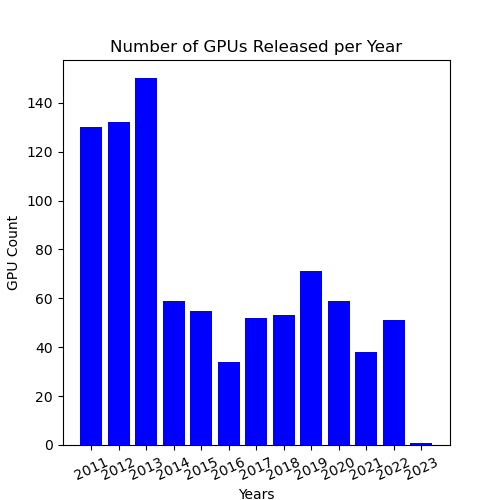

In [42]:
# graphing the number of gpu's released per year

# storing and counting the years from the database
year_counts = df1.value_counts('Release Year')

# separating the values
years = year_counts.index
counts = year_counts.values

# graph
plt.figure(figsize = (5,5))
plt.bar(years, counts, color = 'blue', data = year_counts)
plt.xlabel('Years')
plt.xticks(years, years, rotation = 25)
plt.ylabel('GPU Count')
plt.title('Number of GPU''s Released per Year')
plt.show()